In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

from utils import DataSet, generate_features_for_smiles, grid_search, plot_results

pd.set_option('display.max_rows', None)

Loading model: LMA_RF_200
Test R2 score: 0.927


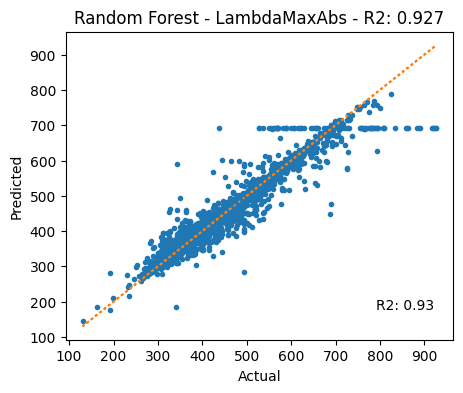

In [10]:
lma_data = DataSet(target="LambdaMaxAbs", fill_na="drop", drop_features=["Ipc"])

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_params = {
    "n_estimators": [100],
    "max_depth": [20],
}

grid, y_pred, r2 = grid_search(
    estimator=rf, params=grid_params, data=lma_data, model_name="LMA_RF_200"
)

plot_results(
    y=lma_data.y_test["LambdaMaxAbs"],
    y_hat=y_pred,
    title=f"Random Forest - LambdaMaxAbs - R2: {r2:.3f}",
)

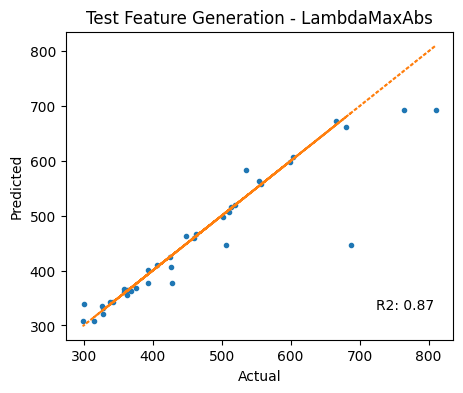

In [11]:
# Testing feature generation functions
sample_y = lma_data.y_test.sample(40, random_state=42)
smiles = sample_y['SMILES'].tolist()

features_df = generate_features_for_smiles(
    smiles,
    descriptors=grid.feature_names_in_, # type: ignore
    missing_value=None,
    log_missing=True)

pred_from_features = grid.predict(features_df)

plot_results(
    y=sample_y["LambdaMaxAbs"],
    y_hat=pred_from_features,
    title=f"Test Feature Generation - LambdaMaxAbs",
)